Download data

In [39]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [40]:
# !ls gdrive/MyDrive/PED

In [41]:
import pandas
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
%matplotlib inline

df = pandas.read_csv('../../data/reddit_wsb.csv')
df["body"] = df["body"].fillna('')
df["title"] = df["title"].fillna('')

df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name
0,Due to all the manipulation happening on sever...,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611768e+09,Many trading platforms have disabled the abili...,Wed Jan 27 18:18:38 2021,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,t3_l69fvk
1,Holding GME till the squeeze has squoze. 6421@21,1156,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,1.611962e+09,,Sat Jan 30 00:12:20 2021,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,t3_l87ci6
2,Going long on my dick,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612416e+09,A month ago I found out that I have a big dick...,Thu Feb 4 06:17:59 2021,0.40,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,t3_lc8dnh
3,"TASTYWORKS IS ALSO SETTING ""CERTAIN"" STOCKS TO...",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611852e+09,"""Apex Clearing, who acts as the custodian of a...",Thu Jan 28 17:35:13 2021,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,t3_l71knz
4,PLEASE HELP THIS IS A DUMBASS FUCKING QUESTION,3,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,1.611849e+09,I\u2019ve been following for a couple years......,Thu Jan 28 16:45:57 2021,0.67,False,/r/wallstreetbets/comments/l70720/please_help_...,t3_l70720
...,...,...,...,...,...,...,...,...,...,...,...,...
38903,Damn.. with the government getting involved an...,0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611772e+09,I don\u2019t have much.. but I\u2019d rather n...,Wed Jan 27 19:32:50 2021,0.41,False,/r/wallstreetbets/comments/l6b99w/damn_with_th...,t3_l6b99w
38904,DONT BE FOOLED BY PRICE DROP IN $AMC. THE VOLU...,15,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,1.611847e+09,,Thu Jan 28 16:15:16 2021,0.86,False,/r/wallstreetbets/comments/l6zb4b/dont_be_fool...,t3_l6zb4b
38905,For everyone searching by new who wants to buy...,75,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,1.611850e+09,This is according to other users in the commen...,Thu Jan 28 17:09:14 2021,1.00,False,/r/wallstreetbets/comments/l70tgo/for_everyone...,t3_l70tgo
38906,Why buy GME now,0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,1.612448e+09,Can you retards explain to me why anyone shoul...,Thu Feb 4 15:20:37 2021,0.29,False,/r/wallstreetbets/comments/lcgmi4/why_buy_gme_...,t3_lcgmi4


In [42]:
seconds_in_day = 60 * 60 * 24.
df['sin_time'] = np.sin(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)

Data summary

In [43]:
df.describe()

,score,comms_num,created,upvote_ratio,sin_time,cos_time
count,38908.000000,38908.000000,3.890800e+04,38908.000000,38908.000000,38908.000000
mean,1067.850982,163.336332,1.611946e+09,0.850351,-0.633535,-0.172791
std,8307.709085,2618.299354,2.937302e+05,0.177996,0.495768,0.568335
min,0.000000,0.000000,1.611054e+09,0.000000,-1.000000,-1.000000
25%,7.000000,2.000000,1.611770e+09,0.790000,-0.951130,-0.624448
50%,22.000000,7.000000,1.611849e+09,0.920000,-0.818359,-0.316891
75%,102.000000,23.000000,1.612209e+09,0.980000,-0.591002,0.177299
max,403113.000000,97998.000000,1.613038e+09,1.000000,1.000000,1.000000


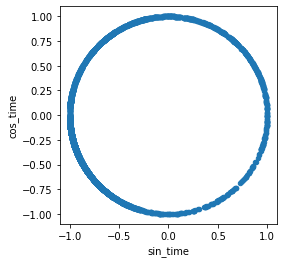

In [44]:
df.sample(5000).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [45]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'upvote_ratio', 'is_oc', 'permalink', 'name', 'sin_time',
       'cos_time'],
      dtype='object')

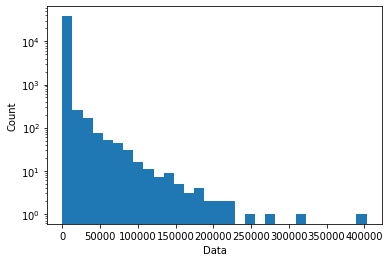

In [46]:
plt.hist(df['score'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');

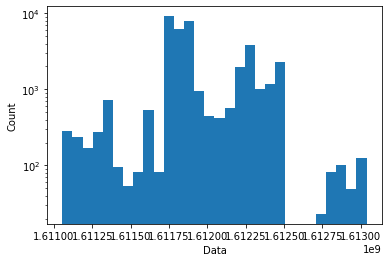

In [47]:
plt.hist(df['created'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');

Text processing

In [48]:
!pip install emoji
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import emoji
import re
tokenizer = nltk.RegexpTokenizer(r"\w+")

nltk.download('stopwords')
# tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
from collections import Counter

'pip' is not recognized as an internal or external command,[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luker\AppData\Roaming\nltk_data...

operable program or batch file.
[nltk_data]   Package stopwords is already up-to-date!


Most common words

In [49]:
len(" ".join(df["body"]))

12721799

In [50]:
body_most_common = Counter(word_tokenize(" ".join(df["body"])))
for key, cnts in list(body_most_common.items()):
  if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
    del body_most_common[key]
body_most_common = body_most_common.most_common(100)
body_most_common


[('I', 29299),
 ('it', 17451),
 ('GME', 10161),
 ('https', 8313),
 ("n't", 8091),
 ('stock', 6171),
 ('shares', 6017),
 ('like', 5799),
 ('buy', 5085),
 ('short', 5029),
 ('market', 4878),
 ('The', 4805),
 ('people', 4639),
 ('get', 4635),
 ('price', 4492),
 ('money', 4360),
 ('know', 4219),
 ('This', 4104),
 ('going', 3895),
 ('would', 3878),
 ('us', 3571),
 ('AMC', 3468),
 ('x200B', 3449),
 ('make', 3302),
 ('one', 3296),
 ('time', 3181),
 ('They', 3060),
 ('sell', 2990),
 ('still', 2951),
 ('see', 2912),
 ('think', 2908),
 ('go', 2906),
 ('We', 2863),
 ('THE', 2863),
 ('If', 2849),
 ('Robinhood', 2783),
 ('stocks', 2766),
 ('could', 2714),
 ('want', 2699),
 ('even', 2669),
 ('back', 2610),
 ('company', 2599),
 ('new', 2568),
 ('trading', 2551),
 ('squeeze', 2442),
 ('It', 2426),
 ('hedge', 2306),
 ('funds', 2279),
 ('right', 2264),
 ('fucking', 2237),
 ('financial', 2230),
 ('buying', 2210),
 ('hold', 2194),
 ('also', 2169),
 ('way', 2125),
 ('need', 2087),
 ('take', 2072),
 ('much'

In [51]:
title_most_common = Counter(word_tokenize(" ".join(df["title"])))
for key, cnts in list(title_most_common.items()):
  if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
    del title_most_common[key]
title_most_common = title_most_common.most_common(100)
title_most_common

[('GME', 8053),
 ('I', 7983),
 ('AMC', 3792),
 ('it', 2836),
 ('THE', 2809),
 ('Robinhood', 2197),
 ('HOLD', 2123),
 ('NOK', 2095),
 ('buy', 1881),
 ('BB', 1874),
 ('TO', 1711),
 ("n't", 1408),
 ('BUY', 1385),
 ('The', 1253),
 ('stock', 1009),
 ('shares', 1009),
 ('still', 1003),
 ('AND', 978),
 ('We', 977),
 ('like', 949),
 ('This', 927),
 ('sell', 923),
 ('WE', 903),
 ('get', 901),
 ('What', 898),
 ('holding', 882),
 ('us', 876),
 ('IS', 871),
 ('moon', 869),
 ('going', 840),
 ('A', 829),
 ('YOU', 808),
 ('NOT', 787),
 ('hold', 786),
 ('go', 778),
 ('today', 759),
 ('WSB', 728),
 ('It', 716),
 ('trading', 671),
 ('market', 669),
 ('money', 660),
 ('buying', 650),
 ('You', 639),
 ('bought', 637),
 ('short', 636),
 ('stocks', 626),
 ('let', 621),
 ('MOON', 620),
 ('RH', 618),
 ('THIS', 574),
 ('They', 570),
 ('Just', 564),
 ('time', 561),
 ('If', 551),
 ('guys', 551),
 ('ON', 545),
 ('How', 542),
 ('dip', 521),
 ('know', 518),
 ('Hold', 518),
 ('selling', 517),
 ('right', 513),
 ('FUCK

Parameters creation

In [52]:
additional_keywords = ['gme', 'hold', 'buy', 'retard', 'wife', 'hedgies', '🚀', 'moon','🧻','🙏', '💎', '🤲','✋','🙌🏼', '🦍', '👋🏼']
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
text_attributes = {}
for key in additional_keywords: 
  text_attributes['title_' + key] = df["title"].str.lower().str.count(key)
  text_attributes['body_' + key] = df["body"].str.lower().str.count(key)




In [53]:
for key, cnts in body_most_common: 
  text_attributes['body_' + key.lower()] = df["body"].str.lower().str.count(key.lower())


for key, cnts in title_most_common: 
  text_attributes['title_' + key.lower()] = df["title"].str.lower().str.count(key.lower())


In [54]:

text_attributes['body_punctuation'] = df['body'].apply(lambda s: count(s, string.punctuation))
text_attributes['title_punctuation'] = df['title'].apply(lambda s: count(s, string.punctuation))

text_attributes['body_cap_ratio'] = df['body'].str.count(r'[A-Z]')/df['body'].str.count(r'[a-zA-Z]')
text_attributes['title_cap_ratio'] = df['title'].str.count(r'[A-Z]')/df['title'].str.count(r'[a-zA-Z]')

text_attributes['time_of_day'] = pandas.to_datetime(df['timestamp']).dt.hour + pandas.to_datetime(df['timestamp']).dt.minute/60

text_attributes['title_length'] = df['title'].apply(len)
text_attributes['title_non_alphanumeric_ratio'] = df['title'].str.count(r'[^A-Za-z0-9]')/df['title'].apply(len)


In [55]:
def regex_count_in_url_and_body(regex):
    return df['body'].apply(lambda s: len(re.findall(regex, s))) + df['url'].apply(lambda s: len(re.findall(regex, s)))

In [56]:
text_attributes['link'] = regex_count_in_url_and_body(r'(https?://[^\s]+)')
text_attributes['reddit_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?redd\.?it[^\s]+)')
text_attributes['yt_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?youtu\.?be[^\s]+)')
text_attributes['tweet_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?twitter[^\s]+)')
text_attributes['facebook_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?facebook[^\s]+)')

text_attributes['gif'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?giphy[^\s]+)') + regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?gifyu[^\s]+)') + regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?gfycat[^\s]+)') + df['url'].apply(lambda s: len(re.findall(r'(\.gif)', s)))

text_attributes = pandas.DataFrame(text_attributes)
text_attributes
df[text_attributes['gif']>=1]

,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name,sin_time,cos_time
274,The battle of 01/22/21,29,l2vozj,https://i.redd.it/9dj6b0fbwxc61.gif,3,1.611346e+09,,Fri Jan 22 21:00:25 2021,0.88,False,/r/wallstreetbets/comments/l2vozj/the_battle_o...,t3_l2vozj,-0.865115,0.501574
377,The Big Short Squeeze,688,l2ysvu,https://i.redd.it/ratl459cnyc61.gif,26,1.611355e+09,,Fri Jan 22 23:32:00 2021,0.97,False,/r/wallstreetbets/comments/l2ysvu/the_big_shor...,t3_l2ysvu,-0.374607,0.927184
503,Y Tú robinhood?,5,l6z8in,https://i.redd.it/4lw7x9ifa3e61.gif,0,1.611847e+09,,Thu Jan 28 16:12:50 2021,1.00,False,/r/wallstreetbets/comments/l6z8in/y_tú_robinhood/,t3_l6z8in,-0.745573,-0.666424
597,"57.19... Not great, not terrible",19,lcpar2,https://i.redd.it/tuvocw1ptif61.gif,1,1.612471e+09,,Thu Feb 4 21:31:26 2021,0.91,False,/r/wallstreetbets/comments/lcpar2/5719_not_gre...,t3_lcpar2,-0.789531,0.613711
860,Put exactly $1 into GME on Thursday because it...,1,lb6x64,https://i.pinimg.com/originals/82/bd/6a/82bd6a...,0,1.612301e+09,,Tue Feb 2 22:27:10 2021,1.00,False,/r/wallstreetbets/comments/lb6x64/put_exactly_...,t3_lb6x64,-0.618523,0.785767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38261,Attention on deck! This is for you new people...,2130,l7oc8o,https://gfycat.com/showygrimyamberpenshell,88,1.611912e+09,,Fri Jan 29 10:26:40 2021,0.99,False,/r/wallstreetbets/comments/l7oc8o/attention_on...,t3_l7oc8o,0.620235,-0.784416
38363,"Looks like a pleasant day, can't wait for tomo...",20,lckl3w,https://giphy.com/gifs/girl-horror-creepy-aOPI...,0,1.612459e+09,,Thu Feb 4 18:14:23 2021,0.89,False,/r/wallstreetbets/comments/lckl3w/looks_like_a...,t3_lckl3w,-0.980257,-0.197729
38606,Me holding my GME shares no matter what,585,lci7es,https://i.redd.it/6vt1tp4qchf61.gif,16,1.612453e+09,,Thu Feb 4 16:34:40 2021,0.95,False,/r/wallstreetbets/comments/lci7es/me_holding_m...,t3_lci7es,-0.805584,-0.592482
38825,How I feel holding my $GME shares on RobbingHood,399,l8bxhr,https://i.redd.it/keehwjjivde61.gif,52,1.611975e+09,,Sat Jan 30 03:48:47 2021,0.98,False,/r/wallstreetbets/comments/l8bxhr/how_i_feel_h...,t3_l8bxhr,0.671667,0.740853


In [57]:
text_attributes.describe()

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,title_cap_ratio,time_of_day,title_length,title_non_alphanumeric_ratio,link,reddit_link,yt_link,tweet_link,facebook_link,gif
count,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,...,38784.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000
mean,0.222422,0.319703,0.138558,0.202632,0.125964,0.263005,0.028709,0.074124,0.002365,0.010640,...,0.297844,16.240666,56.324766,0.223881,1.200576,0.694587,0.010461,0.013956,0.000026,0.007351
std,0.452974,1.189655,0.557488,0.762966,0.424397,1.127260,0.173777,0.443312,0.049096,0.124966,...,0.347737,5.014017,45.491139,0.097543,1.359625,0.833473,0.111158,0.148451,0.005070,0.085722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,15.766667,25.000000,0.176471,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,17.233333,43.000000,0.212121,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.347826,18.516667,73.000000,0.254902,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,40.000000,36.000000,35.000000,30.000000,114.000000,3.000000,35.000000,2.000000,4.000000,...,1.000000,23.983333,300.000000,1.000000,53.000000,26.000000,6.000000,10.000000,1.000000,2.000000


In [58]:
df.describe()

,score,comms_num,created,upvote_ratio,sin_time,cos_time
count,38908.000000,38908.000000,3.890800e+04,38908.000000,38908.000000,38908.000000
mean,1067.850982,163.336332,1.611946e+09,0.850351,-0.633535,-0.172791
std,8307.709085,2618.299354,2.937302e+05,0.177996,0.495768,0.568335
min,0.000000,0.000000,1.611054e+09,0.000000,-1.000000,-1.000000
25%,7.000000,2.000000,1.611770e+09,0.790000,-0.951130,-0.624448
50%,22.000000,7.000000,1.611849e+09,0.920000,-0.818359,-0.316891
75%,102.000000,23.000000,1.612209e+09,0.980000,-0.591002,0.177299
max,403113.000000,97998.000000,1.613038e+09,1.000000,1.000000,1.000000


In [59]:
for i in ['score', 'sin_time', 'cos_time']:
  text_attributes[i] = df[i]  
text_attributes['day'] = pandas.to_datetime(df['timestamp']).dt.day
text_attributes['month'] = pandas.to_datetime(df['timestamp']).dt.month
text_attributes.describe()

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,reddit_link,yt_link,tweet_link,facebook_link,gif,score,sin_time,cos_time,day,month
count,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,...,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000
mean,0.222422,0.319703,0.138558,0.202632,0.125964,0.263005,0.028709,0.074124,0.002365,0.010640,...,0.694587,0.010461,0.013956,0.000026,0.007351,1067.850982,-0.633535,-0.172791,20.427830,1.281099
std,0.452974,1.189655,0.557488,0.762966,0.424397,1.127260,0.173777,0.443312,0.049096,0.124966,...,0.833473,0.111158,0.148451,0.005070,0.085722,8307.709085,0.495768,0.568335,11.168385,0.449541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-0.951130,-0.624448,4.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,-0.818359,-0.316891,27.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,102.000000,-0.591002,0.177299,28.000000,2.000000
max,20.000000,40.000000,36.000000,35.000000,30.000000,114.000000,3.000000,35.000000,2.000000,4.000000,...,26.000000,6.000000,10.000000,1.000000,2.000000,403113.000000,1.000000,1.000000,31.000000,2.000000


In [60]:
print(pandas.to_datetime(df['timestamp'].head(10)))
print(pandas.to_datetime(df['timestamp'].head(10)).dt.day)
print(pandas.to_datetime(df['timestamp'].head(10)).dt.month)

0   2021-01-27 18:18:38
1   2021-01-30 00:12:20
2   2021-02-04 06:17:59
3   2021-01-28 17:35:13
4   2021-01-28 16:45:57
5   2021-01-28 16:42:29
6   2021-02-03 21:17:48
7   2021-01-27 18:06:55
8   2021-01-28 17:18:51
9   2021-01-25 15:54:30
Name: timestamp, dtype: datetime64[ns]
0    27
1    30
2     4
3    28
4    28
5    28
6     3
7    27
8    28
9    25
Name: timestamp, dtype: int64
0    1
1    1
2    2
3    1
4    1
5    1
6    2
7    1
8    1
9    1
Name: timestamp, dtype: int64


In [61]:
print(re.findall('http','ahttpjkshdoifjdshttp'))
print()
print(re.findall(r"https?://(?:(?:[^\s()])|(?:\(\S*\)]*\)))+", 'https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator(dupa=dupa()))'))

['http', 'http']

['https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator(dupa=dupa()))']


In [62]:
text_attributes['body_🙏'].describe()
text_attributes['score'].min() == text_attributes['score'].max() 

False

Remove constant columns

In [63]:
to_be_removed = []
for column in text_attributes:
  if text_attributes[column].min() == text_attributes[column].max():
    to_be_removed.append(column)
len(to_be_removed) # 11

10

In [64]:
for i in to_be_removed:
  del text_attributes[i]

In [65]:
# for column in text_attributes:
#     print(column, text_attributes[column].corr(df['score']))

Korelacja

In [66]:
corrMatrix = text_attributes.corr()

In [67]:
x = corrMatrix['score'][corrMatrix['score']<1]
print(x.min(), x.keys()[x.argmin()])
print(x.max(), x.keys()[x.argmax()])
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  print(x.sort_values())

-0.053676375912373224 time_of_day
0.08473202417909403 sin_time
time_of_day                    -0.053676
reddit_link                    -0.041547
body_cap_ratio                 -0.028143
title_nok                      -0.022974
title_amc                      -0.020331
title_cap_ratio                -0.020048
title_buy                      -0.019903
title_bb                       -0.015615
title_moon                     -0.013816
title_dip                      -0.011832
title_non_alphanumeric_ratio   -0.010229
title_stocks                   -0.008375
title_much                     -0.008060
title_stock                    -0.007286
body_moon                      -0.007242
title_🚀                        -0.007115
title_rh                       -0.007068
title_what                     -0.006312
title_think                    -0.006048
title_let                      -0.004916
body_auto=webp                 -0.004771
body_bb                        -0.004694
body_robinhood                 -0.0

In [68]:
treshold = .5
for i,column in enumerate(corrMatrix):
  x = corrMatrix[column][i+1:]
  
  if x.min() < -treshold:
    print(x.min(), column, x.keys()[x.argmin()])
  if x.max() > treshold:
    print(x.max(), column, x.keys()[x.argmax()])

0.556181867225199 body_gme body_to
0.5747731266302558 body_hold body_holding
0.5982556039781806 body_buy body_buying
0.7541802385261455 title_retard title_retards
0.988532528245054 body_i body_a
0.9477545565354936 body_it body_a
0.895498930203969 body_https link
0.5582719859725694 body_n't body_to
0.6886665673219353 body_stock body_to
0.9354781639093317 body_shares body_share
0.6431465846852972 body_like body_this
0.8102170530178124 body_short body_shorts
0.6955113838070937 body_market body_a
0.9420364746644119 body_the body_a
0.5304543728953983 body_people body_to
0.6804468702206128 body_get body_to
0.5650362237319707 body_price body_to
0.7291958184345435 body_money body_one
0.6128004521648454 body_know body_and
0.8172453782360134 body_this body_to
0.6808707020857873 body_going body_go
0.5775698163902055 body_would body_to
0.8977432168652494 body_us body_a
0.6135371157077126 body_make body_to
0.7902721213425519 body_one body_a
0.6377433533719397 body_time body_a
0.6915455706879439 bod